In [242]:
import yolov5
import numpy as np
from PIL import Image
from collections import Counter
import re
from PIL import Image, ImageEnhance
import unidecode

# or load custom model
model = yolov5.load('./model/best.pt')
# model.conf = 0.25
model.classes = [0,1]

In [300]:
# Infomation extraction
def remove_accent(text):
    return unidecode.unidecode(text)


def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    # print('Texts:')
    list_t = []
    for text in texts:
        # try:
        #     text = float(text.description))
        # except:
        text = text.description
        list_t.append(text)
        #print('\n"{}"'.format(text.description))

        # vertices = (['({},{})'.format(vertex.x, vertex.y)
        #             for vertex in text.bounding_poly.vertices])

        # print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return list_t

def replace_invalid(list_detected_text_2):
    f = lambda x: x.replace(" ", ",", ":", ";", "!", "-", "=", "+")
    invalid_chars = [' ', ',', ';', '{', '}', '(', ')', '\n', '\t', '=', ":", ";", "!", "-", "=", "+","/", "_"]
    invalid_table = str.maketrans({k:'.' for k in invalid_chars})
    list_valid = [float(a.translate(invalid_table)) for a in list_detected_text_2]
    return list_valid

def get_info(path_p):
    temp2 = enhence_resolution(path_p,1.5)
    temp = detect_text(temp2)
    uni_text = remove_accent(temp[0])
    dict_info = {}
    # Define index
    try: 
        i1 = uni_text.index("dat so")
    except:
        i1 = uni_text.index("a)")
    i2 = uni_text.index(("do so" or "do"))
    try: 
        i3 = uni_text.index("Dia chi")
    except:
        i3 = uni_text.index("b)")
    try:
        i4 = uni_text.index("Dien tich")
    except:
        i4 =  uni_text.index("c)")
    try:
        i5 = uni_text.index("d)")
    except:
        i5 = uni_text.index("Hinh thuc")
    #find thua dat so
    try:
        if i1 < i2:
            num1 = re.findall(r"\d+",uni_text[i1:i2])[0]
        else:
            num1 = re.findall(r"\d+",uni_text[i1:])[0]
    except:
        num1 = -1
    dict_info["Thửa đất số"] = num1
    #find so to
    try:
        if i2 < i3:
            num2 = re.findall(r"\d+",uni_text[i2:i3])[0]
        else:
            num2 = re.findall(r"\d+",uni_text[i2:])[0]
    except:
        num2 = -1
    dict_info["Tờ bản đồ số"] = num2
    #find address
    try:
        if i3 < i4:
            add = temp[0][i3:i4].split(":")[1]
        else:
            add = temp[0][i3:].split(":")[1]
    except:
        add = "None"
    add = add.replace("\n", ",")
    dict_info["Địa chỉ thửa đất"] = add
    #Find dien tich
    try:
        # num3 = re.findall(r"\d+[.,_+-]?\d+m",temp[0])[0][:-1]
        num3 = re.findall(r"\d+?\s?\d+[.,_+-]?\d+m",detect_text("temp1.png")[0])[0][:-1].replace(" ", "")
    except:
        try:
            # if i4 < i5:
            #     strs = re.findall(r'\d+[\W|_]?\d*', uni_text[i4:i5])
            #     num3 = replace_invalid(strs)[0]
            # else:
                strs = re.findall(r'\d+[.,_+-]?\d*', uni_text[i4:])
                num3 = replace_invalid(strs)[0]
                if num3 <= 10:

                    num3 = replace_invalid(strs)[1]
                else:
                    num3 = replace_invalid(strs)[0]
        except:
            num3 = -1
    dict_info["Diện tích"] = num3
    return dict_info

def enhence_resolution(img, p_factor):
    im = Image.open(img)
    enhancer = ImageEnhance.Contrast(im)
    factor = p_factor #gives original image
    im_output = enhancer.enhance(factor)
    name = 'original-image.png'
    im_output.save(name)
    return name


In [301]:
# For coordinate extraction
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    # print('Texts:')
    list_t = []
    for text in texts:
        # try:
        #     text = float(text.description))
        # except:
        text = text.description
        list_t.append(text)
        #print('\n"{}"'.format(text.description))

        # vertices = (['({},{})'.format(vertex.x, vertex.y)
        #             for vertex in text.bounding_poly.vertices])

        # print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return list_t

def islen(num):
    try:
        if(float(num) < 1000) and len(num) > 1:
            return True
    except ValueError:
        return False
    
def check_num(num):
    try:
        float(num)
        return True
    except:
        return False

def replace_invalid(list_detected_text_2):
    f = lambda x: x.replace(" ", ",", ":", ";", "!", "-", "=", "+")
    invalid_chars = [' ', ',', ';', '{', '}', '(', ')', '\n', '\t', '=', ":", ";", "!", "-", "=", "+","/"]
    invalid_table = str.maketrans({k:'' for k in invalid_chars})
    list_valid = [a.translate(invalid_table) for a in list_detected_text_2]
    return list_valid

def check_point(x,i):
    try:
        x.index('.') == i
        return True
    except: 
        return False

def check_point2(x):
    try:
        x.index('.')
        return True
    except:
        return False
def check_len(str1):
    try:
        if float(str1) > 100000:
            return True
        else:
            return False
    except:
        return False

def last_check(img):
    temp = 0
    for factor in [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0, 2.1]:
        a = detect_cordinate2(img, factor)
        
        if list(a[0].values()).count(list(a[0].values())[0]) == 2:
            break;
        else:
            temp = factor + 0.5
    if factor == 2.1:
        a1 = detect_cordinate2(img, 1)
        return False, a1, 1
    else: 
        return True, a, factor
        
def detect_cordinate2(img, p_factor):
    img2 = enhence_resolution(img, p_factor)
    list_t_f = detect_text(img2)
    list_temp = list_t_f[0].split('\n')

    list_temp11 = []
    for a in list_temp:
        if (" " in a) and (len(a) > 12):
            list_temp11 = list_temp11 + a.split(" ")
        else:
            list_temp11.append(re.sub(' +', '.', a))

    list_temp1 = replace_invalid(list_temp11)

    list_temp2 = []
    for a in list_temp1:
        if a[0:1].isdigit():
            # a1 = a.replace(' ','.')

            a1 = re.sub(' +', '.', a)
            a2 = a1.replace(',','.')
            list_temp2.append(a2)
            
    list_fre = [a[:2] for a in list_temp2]
    c = Counter(list_fre)
    list_com = [a[0] for a in c.most_common(2)]
    list_com.sort()
    

    # index_point = []
    # for a in list_temp2:
    #     try:
    #         index_point.append(a.index('.'))
    #     except:
    #         index_point.append(-1)

    
    
    new_list_temp = []   
    for l in list_temp2:
        if check_point2(l) == False:
            if l[:2] == list_com[0]:
                i = 7
            else:
                i = 6
            new_list_temp.append(l[:i]+"."+l[i:])
        else:
            new_list_temp.append(l)
    
#     list_fre = [a[:2] for a in new_list_temp]
#     c = Counter(list_fre)
#     list_com = [a[0] for a in c.most_common(2)]
#     list_com.sort()
    
    dict_temp = {}
    count = 0
    i= 7
    for a in list_com:
        dict_temp[count] = [re.findall("\d*.\d+", b)[0].replace('-','') for b in new_list_temp if b.startswith(a) and (check_len(b) == True) and ("12345" not in b)]
        # temp = []
        # for a in dict_temp[count]:
        #     if check_point(a,i) == True:
        #         temp.append(a)
        #     else:
        #         temp.append(a[:i]+"."+a[i:])
        # dict_temp[count] = temp
        # i = 6
        count = count + 1
    
    cor = {}
    count = 1
    for i,j in zip(dict_temp[0],dict_temp[1]):
        cor[count] = (float(i),float(j))
        count = count + 1
    
    
    list_len =  [float(a) for a in new_list_temp[-len(cor):] if islen(a)]
    
    return cor, list_len

def enhence_resolution(img, p_factor):
    im = Image.open(img)
    enhancer = ImageEnhance.Contrast(im)
    factor = p_factor #gives original image
    im_output = enhancer.enhance(factor)
    name = 'original-image.png'
    im_output.save(name)
    return name

In [326]:
path = 'image/OCR_Internet_Collection_EUS23.jpg'
# perform inference
results = model(path)
img = results.crop()
for i in img:
    if (i["cls"] == 1):
        img = Image.fromarray(i["im"], 'RGB')
        img.save("temp1.png")
    else:
        img = Image.fromarray(i["im"], 'RGB')
        img.save("temp2.png")
dict_info = get_info("temp1.png")
dict_coor = last_check("temp2.png")
dict_result = {}
dict_result["info"] = dict_info
dict_result["coor"] = dict_coor

In [330]:
dict_info = get_info(path)
dict_info

{'Thửa đất số': '352',
 'Tờ bản đồ số': '64',
 'Địa chỉ thửa đất': ' Xã Phạm Văn Hai, Huyện Bình Chánh, Thành phố Hồ Chí Minh.,c) ',
 'Diện tích': '96,2'}

In [323]:
dict_result

{'info': {'Thửa đất số': '779',
  'Tờ bản đồ số': '48',
  'Địa chỉ thửa đất': ' Xã,c) ',
  'Diện tích': '96,2'},
 'coor': (True,
  ({1: (1195682.14, 583704.26),
    2: (1195680.02, 583703.73),
    3: (1195678.79, 583708.58),
    4: (1195680.87, 583709.1),
    5: (1195682.14, 583704.26),
    6: (1195678.79, 583708.58),
    7: (1195680.02, 583697.28),
    8: (1195654.2, 583702.13),
    9: (1195652.96, 583708.58)},
   []),
  1.5)}

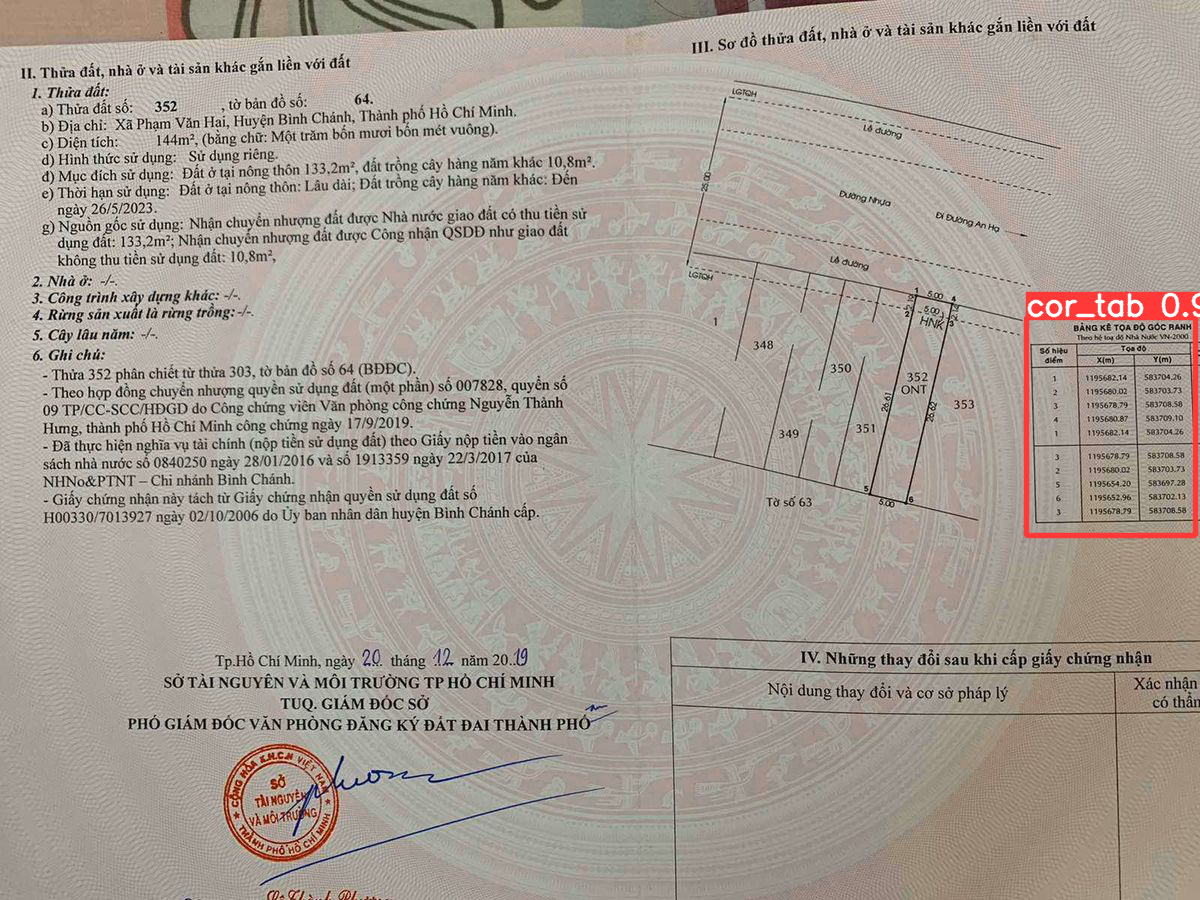

In [329]:
results.show()